In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from src.neural_network.dataset_creation import create_dataset

Подготовим данные

In [19]:
time_offset = 14
df = pd.read_csv('stocks_data/AAPL_HOUR.csv')
df = df['Close'].values
df = df.reshape(-1, 1)
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
x_train, y_train = create_dataset(dataset_train, time_offset)
x_test, y_test = create_dataset(dataset_test, time_offset)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Загрузим модель и посмотрим, как она предсказывает данные

23/23 [==============================] - 2s 9ms/step


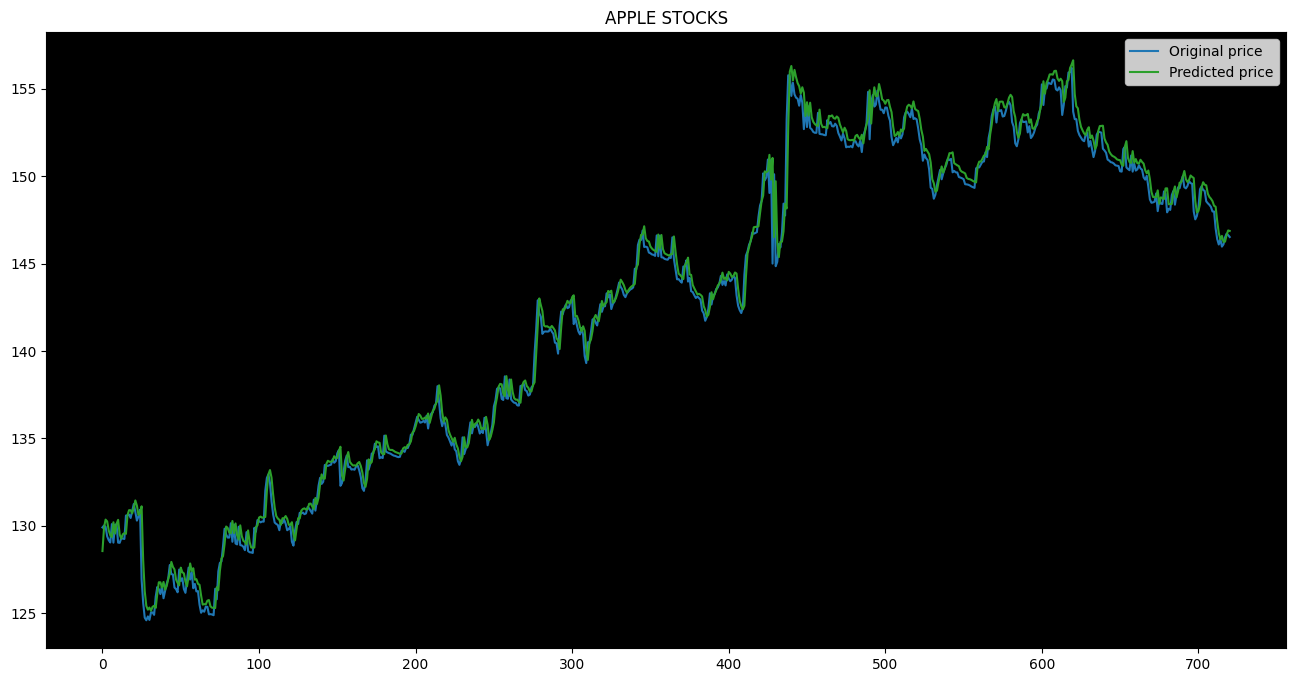

In [20]:
model = load_model("src/neural_network/stock_prediction.h5")
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('black')
ax.plot(y_test_scaled, color='tab:blue', label='Original price')
ax.plot(predictions, color='tab:green', label='Predicted price')
plt.legend()
plt.title("APPLE STOCKS")
plt.show()


In [21]:
time_offset = 14
df = pd.read_csv('stocks_data/TSLA_HOUR.csv')
df = df['Close'].values
df = df.reshape(-1, 1)
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
x_train, y_train = create_dataset(dataset_train, time_offset)
x_test, y_test = create_dataset(dataset_test, time_offset)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

22/22 [==============================] - 2s 11ms/step


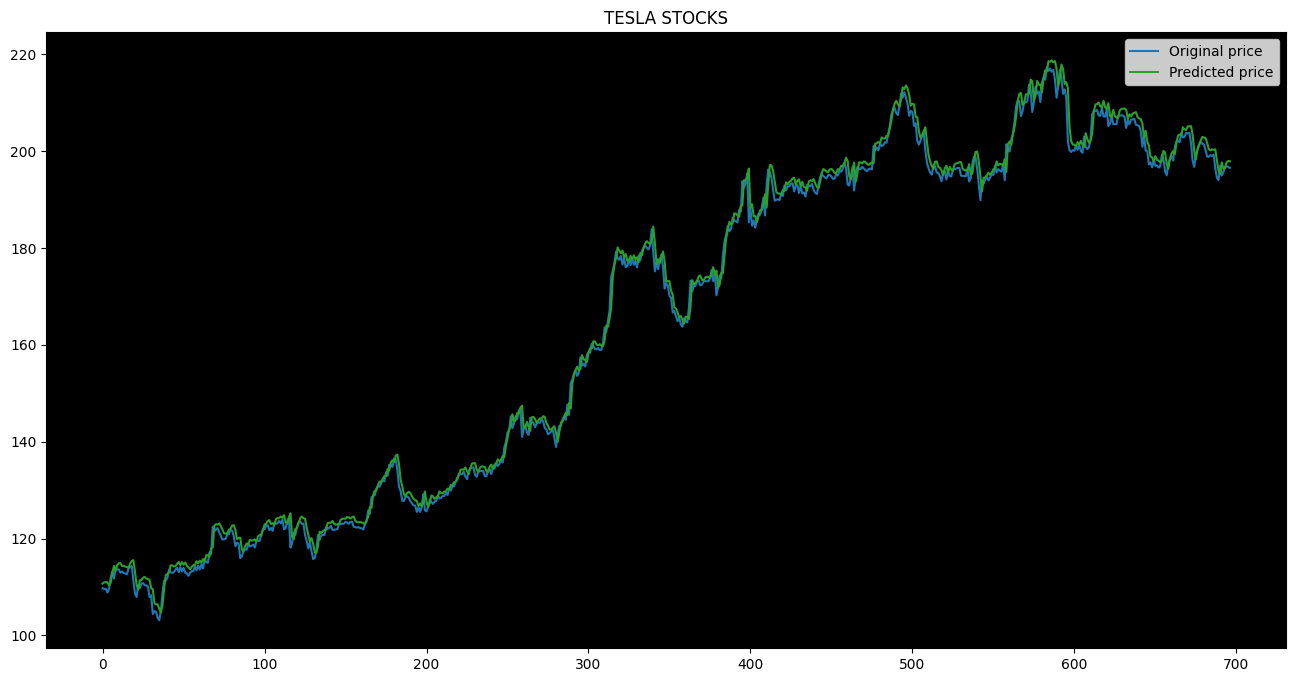

In [22]:
model = load_model("src/neural_network/stock_prediction.h5")
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('black')
ax.plot(y_test_scaled, color='tab:blue', label='Original price')
ax.plot(predictions, color='tab:green', label='Predicted price')
plt.legend()
plt.title("TESLA STOCKS")
plt.show()